# Twitter Sentiment Analysis using Tweepy and TextBlob 

## importer librairies 

In [1]:
from textblob import TextBlob 
import sys ,tweepy 
import matplotlib.pyplot as plt

## Function percentage 

In [2]:
def percentage (part , whole):
    return 100 * float(part)/float(whole)

## key twitter

In [3]:
consumerkey = "2TZ1K5IosiWpBB1AgRzUN2OYe"
consumerSecret = "wYB8KHMlK6IRSf7Rr1Chl1jx2chaRqzPa4HVKoZsHVWIMJ7g4d"
accessToken = "1184232235488219136-bFjHLEHvbLcBt9SJ5PqXvNhfmd2wX4"
accessTokenSecret = "3GLCtypZ0ibi2DVMY9sgQwnVuooBE90raAxtUik4luNfv"

In [4]:
#Authentication
auth = tweepy.OAuthHandler(consumerkey ,consumerSecret)
auth.set_access_token(accessToken , accessTokenSecret)
api = tweepy.API(auth)

In [139]:
##input Search term 
searchTerm = input("Enter keyword/hashtag to search about :")

Enter keyword/hashtag to search about :python


In [143]:
##input Number Search Terms 
noOfSearchTerms = int(input("Enter how many tweets to analyze :"))

Enter how many tweets to analyze :3000


In [140]:
tweets = api.search(q=searchTerm, lang="en", count=noOfSearchTerms, tweet_mode="extended")

In [141]:
positive = 0 
negative = 0 
neutral = 0 
polarity = 0

In [142]:
for tweet in tweets:
    print(tweet.full_text)

BUSINESS NAME
Ike-njoku David. 
Web developer.
Ajax, XML, Python, php, javascript ,  bootstrap.

Create your websites from as low as 35k
Get your  free lancing websites for even less
Link to last work: https://t.co/qbTps8q3rA 
Email = testuser@afrileg.com
Password = testuser. 
Dm
RT @python__tut: Analysis of Tweets about the Joker in Python

☞ https://t.co/YQRo2mrasM

#python #Django https://t.co/i0sGAfzzdk
RT @ffsake: The Chinese are rescuing British Steel in the same way a python rescues a rat. They are buying up a rival at a knock down price…
RT @z0idex: This is a quick overview of my recon process:

1.) Subdomain Scanning
2.) Resolve host names with python
3.) Masscan / nmap
4.)…
RT @Zerynth: Learn how to create a remote weather station in #Python with Zerynth, @WolkAbout and @XinaBox: https://t.co/ETKfRTlYvz
#IoT #m…
RT @Python_content: If elif and else statement are used A LOT as a Python developer. Make sure you know how to use them! https://t.co/erNto…
"How to Build a 910-wpm T

In [144]:
for tweet in tweets:
    analysis = TextBlob(tweet.full_text)
    polarity += analysis.sentiment.polarity 
    
    if (analysis.sentiment.polarity  == 0):
        neutral += 1
    elif (analysis.sentiment.polarity  < 0.00):
        negative +=1
    elif (analysis.sentiment.polarity  > 0.00):
        positive += 1

In [145]:
positive = percentage(positive ,noOfSearchTerms)
negative = percentage(negative ,noOfSearchTerms)
neutral = percentage(neutral ,noOfSearchTerms)
polarity = percentage(polarity ,noOfSearchTerms)

In [146]:
positive

1.3

In [147]:
positive = format(positive , '.2f')
neutral= format(neutral , '.2f')
negative = format(negative , '.2f')

In [148]:
print ("How people are reacting on "+ searchTerm + "by analyzing "+ str(noOfSearchTerms) + " Tweets")

if (polarity == 0):
    print ("Neutral")
elif(polarity < 0.00):
    print ("Negative")
elif(polarity > 0.00):
    print("Positive")

How people are reacting on pythonby analyzing 3000 Tweets
Positive


In [149]:
labels =['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']

In [150]:
sizes = [ positive , neutral , negative]

In [151]:
colors = ['yellowgreen' , 'gold', 'red']

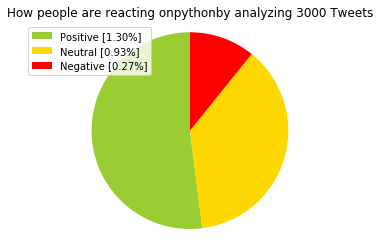

In [152]:
patches , texts = plt.pie(sizes , colors=colors , startangle = 90)
plt.legend(patches , labels , loc="best")
plt.title('How people are reacting on'+ searchTerm + 'by analyzing '+ str(noOfSearchTerms) + ' Tweets')
plt.axis('equal')
plt.show()